Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the dataset

In [4]:
data = pd.read_excel("/content/Copy of loan.xlsx")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Cleaning
Check for missing values


In [5]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


Check for the data types before filling in the missing values

In [6]:
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


Now encode to change from object data type to int64 before filling in the missing values because we are goin g to use mode, mean and median to fill in the misisng values. The columns need to be in form of int and floats in order to be able to use the 3 functions(mode, mean median)

In [7]:

mode_value = data["Dependents"].mode()[0]
data["Dependents"] = data["Dependents"].replace("3+", 3)


data["Dependents"] = data["Dependents"].fillna(mode_value).astype(int)


<ipython-input-7-b6617003b371>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Dependents"] = data["Dependents"].replace("3+", 3)


In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["Gender"] = labelencoder.fit_transform(data["Gender"])
data["Married"] = labelencoder.fit_transform(data["Married"])
data["Dependents"] = labelencoder.fit_transform(data["Dependents"])
data["Education"] = labelencoder.fit_transform(data["Education"])
data["Self_Employed"] = labelencoder.fit_transform(data["Self_Employed"])
data["Property_Area"] = labelencoder.fit_transform(data["Property_Area"])
data["Loan_Status"] = labelencoder.fit_transform(data["Loan_Status"])
data["Loan_ID"] = labelencoder.fit_transform(data["Loan_ID"])

In [9]:
data["Dependents"].unique()


array([0, 1, 2, 3])

In [10]:
data.dtypes

,0
Loan_ID,int64
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


We check for skewed or normalised in order to decide whether to use mean(normalised data) or median(skewed data). For mode we use it to fill in categorical data('1' and '0', 'yes' and 'no')

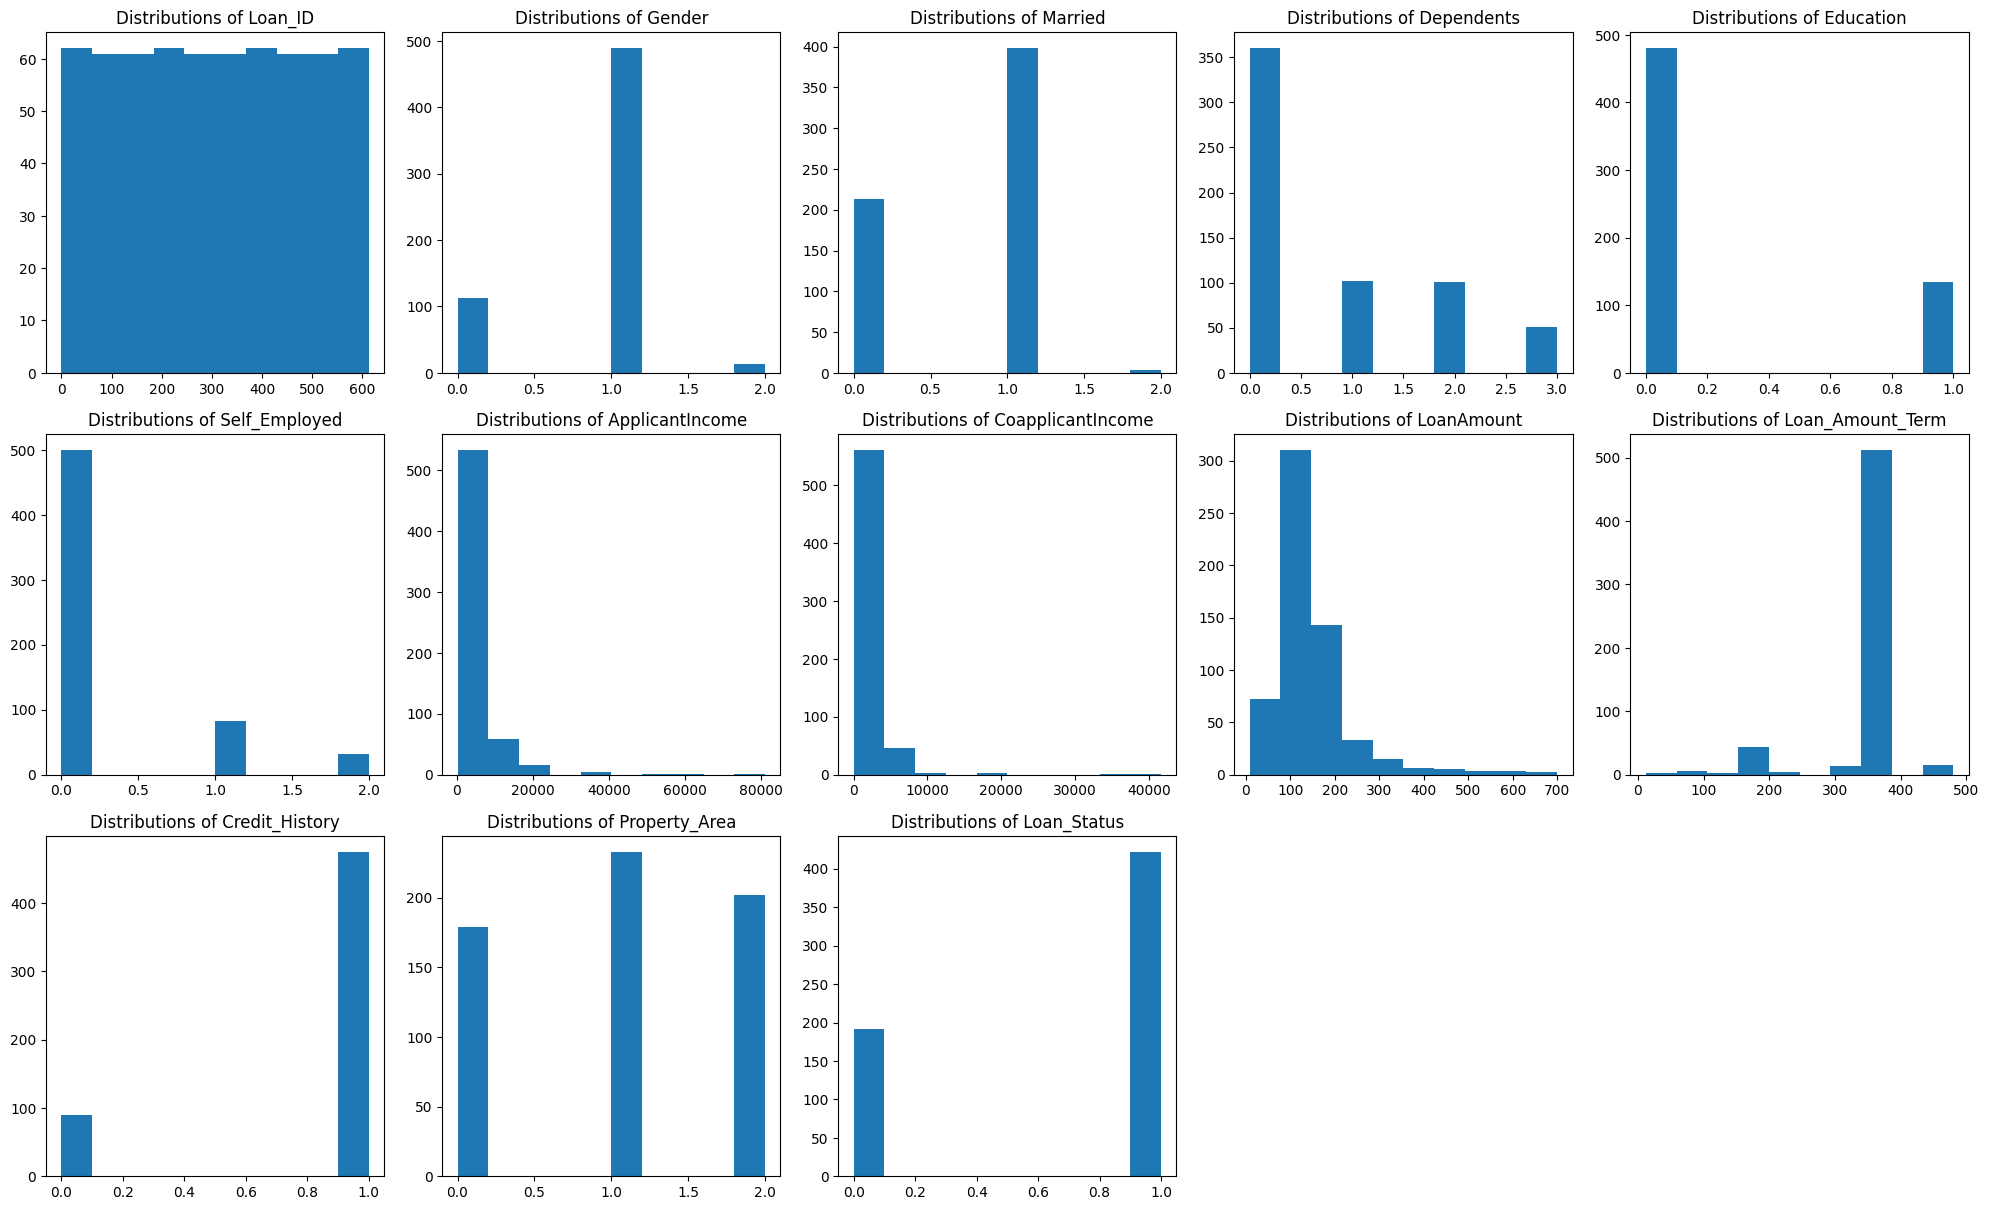

In [11]:
cont_data = data.select_dtypes(exclude = 'object')
def plothisto(cont_data):
    plt.figure(figsize = (20,20))
    for i, col in enumerate(cont_data.columns):
        plt.subplot(5,5, i+1)
        plt.hist(data[col])
        plt.title(f"Distributions of {col}")
    plt.tight_layout()
    plt.show()

plothisto(cont_data)

We can now fill in the missing values

In [12]:
data["Gender"]= data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"]= data["Married"].fillna(data["Married"].mode()[0])
data["Dependents"]= data["Dependents"].fillna(data["Dependents"].median())
data["Self_Employed"]= data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])
data["LoanAmount"]= data["LoanAmount"].fillna(data["LoanAmount"].mean())
data["Loan_Amount_Term"]= data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean())
data["Credit_History"]= data["Credit_History"].fillna(data["Credit_History"].mode()[0])

In [13]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


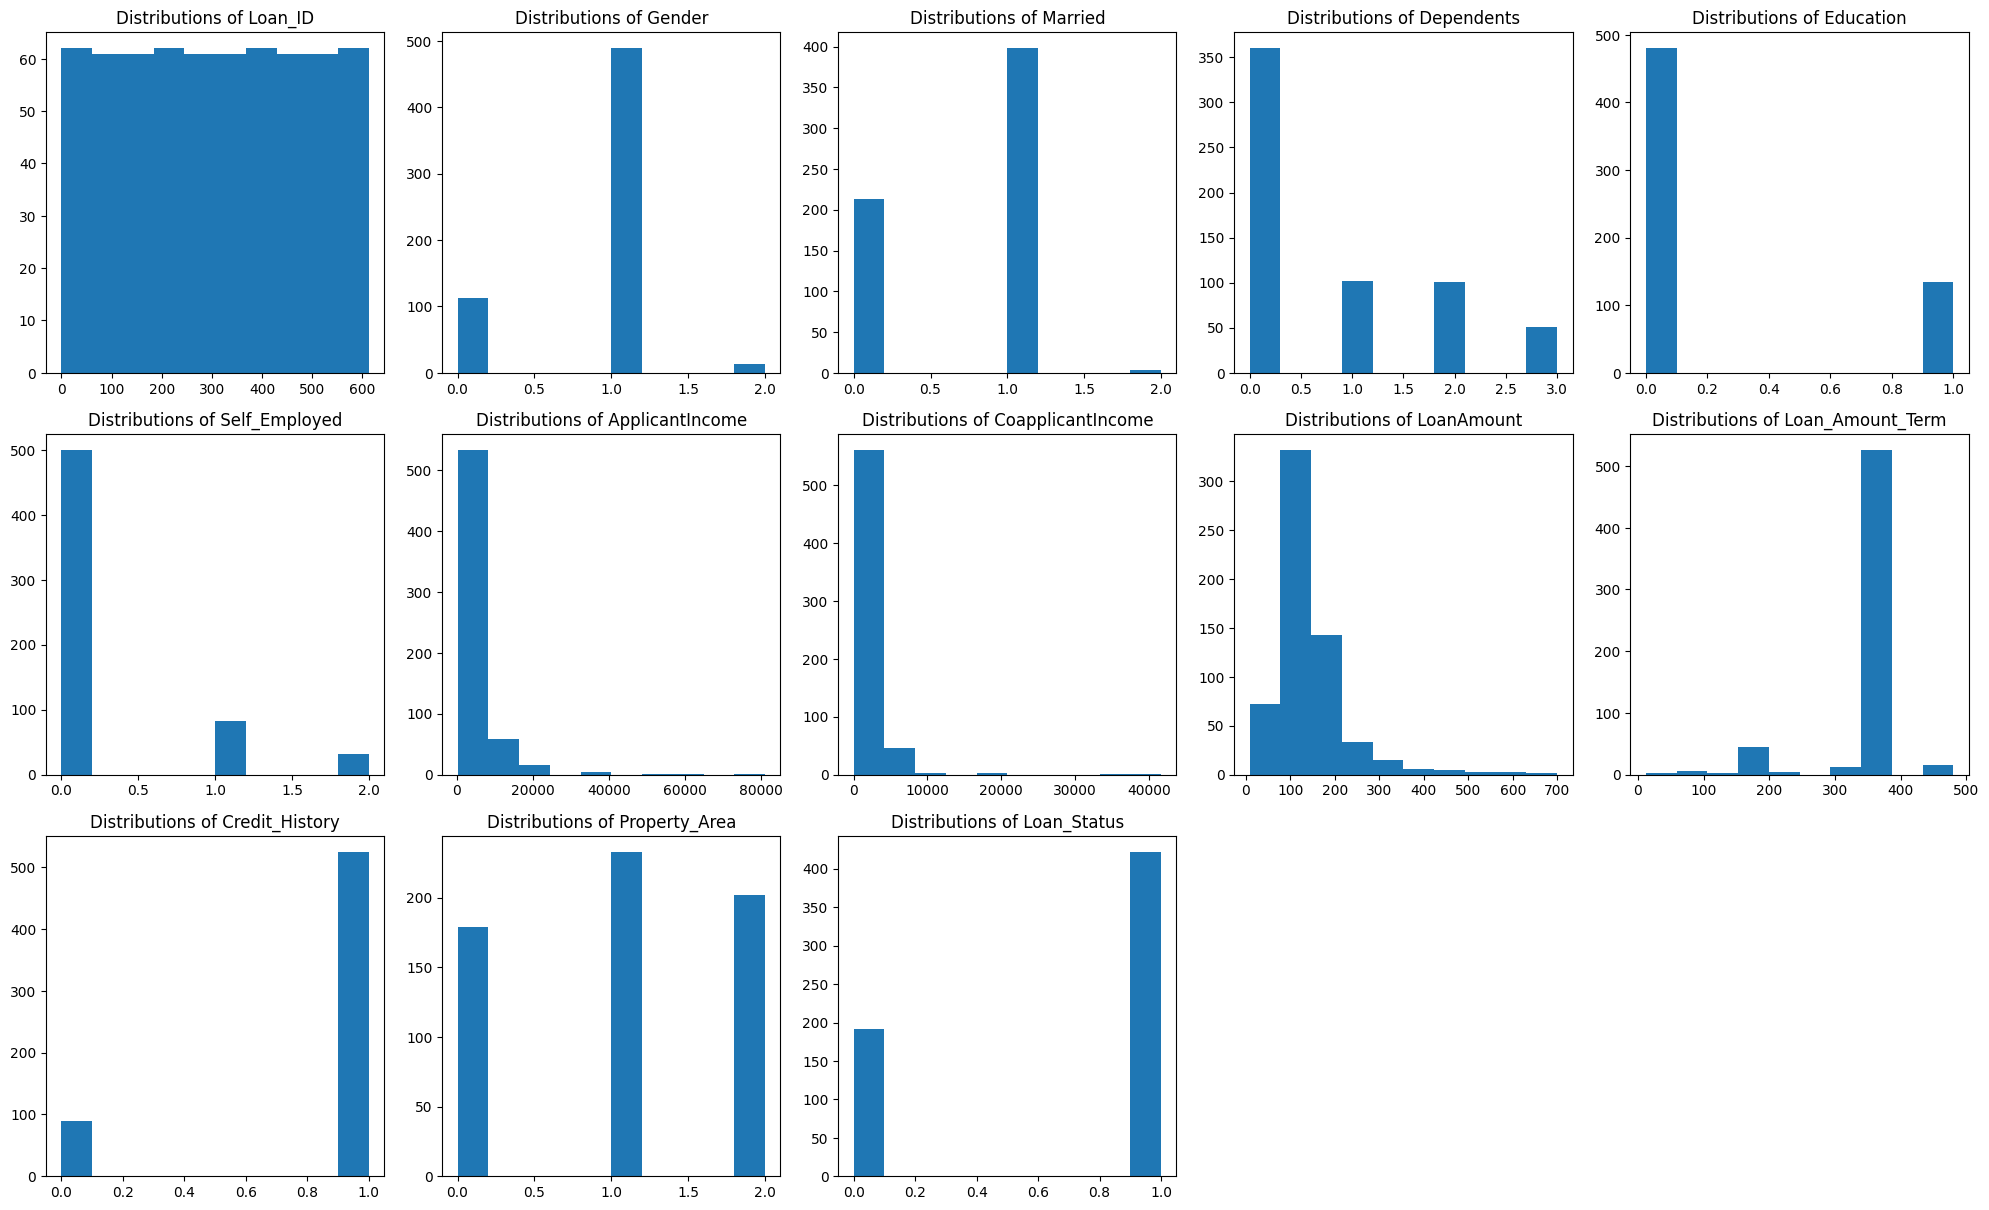

In [14]:
cont_data = data.select_dtypes(exclude = 'object')
def plothisto(cont_data):
    plt.figure(figsize = (20,20))
    for i, col in enumerate(cont_data.columns):
        plt.subplot(5,5, i+1)
        plt.hist(data[col])
        plt.title(f"Distributions of {col}")
    plt.tight_layout()
    plt.show()

plothisto(cont_data)

In [15]:
data.head(40)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,6,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,7,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,8,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,9,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [16]:
data.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.007403,-0.018621,0.051559,0.039442,0.005039,0.016925,0.039211,0.035684,-0.028945,-0.030603,-0.155416,0.011773
Gender,-0.007403,1.000000,0.336094,0.175026,0.024382,-0.025022,0.094472,0.073308,0.136081,-0.067778,-0.003844,-0.030903,0.008690
Married,-0.018621,0.336094,1.000000,0.320851,0.006759,-0.038153,0.052119,0.069877,0.145541,-0.096253,0.014896,0.007973,0.096657
Dependents,0.051559,0.175026,0.320851,1.000000,0.055752,0.025177,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.039442,0.024382,0.006759,0.055752,1.000000,-0.021130,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,0.005039,-0.025022,-0.038153,0.025177,-0.021130,1.000000,0.095664,0.052218,0.089806,-0.036965,0.062019,-0.013439,0.010880
ApplicantIncome,0.016925,0.094472,0.052119,0.118202,-0.140760,0.095664,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.073308,0.069877,0.030430,-0.062290,0.052218,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.035684,0.136081,0.145541,0.163106,-0.166998,0.089806,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.067778,-0.096253,-0.101054,-0.077242,-0.036965,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974


In [17]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Check for correlation to determine best features to use

In [18]:


data['Loan_Status'] = data['Loan_Status']
correlation_matrix = data.corr()
print(correlation_matrix['Loan_Status'].sort_values(ascending=False))


Loan_Status          1.000000
Credit_History       0.540556
Married              0.096657
Property_Area        0.032112
Loan_ID              0.011773
Self_Employed        0.010880
Dependents           0.010118
Gender               0.008690
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64


Split the data into predictors(X) and target(y)

In [19]:
X = data[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area' ]]
y = data['Loan_Status']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Fit the model

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Evaluate the model

In [22]:
from sklearn.metrics import classification_report, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
classif = classification_report(y_test, y_pred)
print(accuracy)
print(classif)

0.6910569105691057
              precision    recall  f1-score   support

           0       0.56      0.56      0.56        43
           1       0.76      0.76      0.76        80

    accuracy                           0.69       123
   macro avg       0.66      0.66      0.66       123
weighted avg       0.69      0.69      0.69       123



In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
classif = classification_report(y_test, y_pred)
print(accuracy)
print(classif)

0.7723577235772358
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
classif = classification_report(y_test, y_pred)
print(accuracy)
print(classif)

0.5853658536585366
              precision    recall  f1-score   support

           0       0.25      0.09      0.14        43
           1       0.64      0.85      0.73        80

    accuracy                           0.59       123
   macro avg       0.44      0.47      0.43       123
weighted avg       0.50      0.59      0.52       123



In [27]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
classif = classification_report(y_test, y_pred)
print(accuracy)
print(classif)

0.6504065040650406
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
accuracy = accuracy_score(y_test, y_pred)
classif = classification_report(y_test, y_pred)
print(accuracy)
print(classif)

0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [31]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


Test the model

In [32]:
input_data = pd.DataFrame({
    'Gender' : [1],
    'Married': [0],
    'Dependents': [0],
    'Education': [0],
    'Self_Employed': [0],
    'ApplicantIncome': [5849],
    'CoapplicantIncome': [0.0],
    'LoanAmount': [146.412162],
    'Loan_Amount_Term': [360.0],
    'Credit_History': [1.0],
    'Property_Area': [2]
})


prediction = model.predict(input_data)


print("Predicted Loan:", prediction[0])



Predicted Loan: 1


input_data = pd.DataFrame({
    'Gender' : [1],
    'Married': [0],
    'Dependents': [0],
    'Education': [0],
    'Self_Employed': [0],
    'ApplicantIncome': [5849],
    'CoapplicantIncome': [0.0],
    'LoanAmount': [146.412162],
    'Loan_Amount_Term': [360.0],
    'Credit_History': [1.0],
    'Property_Area: [2]'
})


prediction = model.predict(input_data)

# Output the prediction result
print("Predicted Loan:", prediction[0])